In [ ]:
import numpy as np # для работы с массивами
from scipy.integrate import odeint # для решения диффуров
import matplotlib.pyplot as plt # для построения графиков
import math

### _Задача_: ~~узнать~~ вспомнить, как решить диффуры.

0) y' = x 

Я тебе помогу.

> dy/dx = x

> dy = xdx

> integral(dy) = integral(xdx)

> y = (x^2)/2 + C - это ответ

1) xy' = y (вот попробуй этот, да, бери бумажку и решай)

2) y = sin(x) + 5, y(0) = 0 (и вот этот)

3) Убедись, что это было не так трудно.
> если было легко - отлично, отдохни

> если очень тяжело, тогда порешай ещё

4) y' + 2y = 0, y(0) = 2

5) y' + (2y + 1) ctg(x) = 0

Надеюсь тебе понравилось, и вспомнились эти задачи. Да, это были простые примеры. Но главное - мы вспомнили, что ответ на эти задачи - функция! Причем, при отсутствии начальных условий она гуляет на константу C. А при начальных условий она определена и не гуляет. (посмотрим графики этих функций)

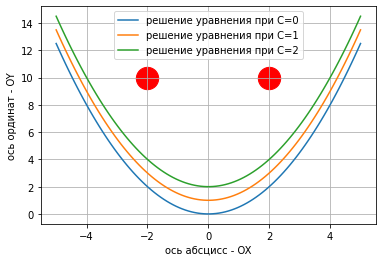

In [ ]:
def f(
    x, # да, просто x
    C, # константа
    ):
  # Это наша функция из номера 0).
  return pow(x, 2)/2 + C

x = np.linspace(-5, 5, 100) # от -5 до 5 берется 100 точек
y_C_0 = f(x, C=0) # Y равен применени f(x, C) над каждой точкой
y_C_1 = f(x, C=1)
y_C_2 = f(x, C=2)

plt.plot(x, y_C_0, label='решение уравнения при С=0') #  нарисуй график (x, y) и подпиши так
plt.plot(x, y_C_1, label='решение уравнения при С=1')
plt.plot(x, y_C_2, label='решение уравнения при С=2')
plt.scatter(-2,10, s=500, marker="o", c='red')
plt.scatter(2,10, s=500, marker="o", c='red')
plt.xlabel('ось абсцисс - OX') # подпиши ось x
plt.ylabel('ось ординат - OY') # подпиши ось y
plt.legend() # отобрази подписи графиков
plt.grid() # отрисуй сетку

### _Дополнительная задача_

Кстати, получилась улыбка. Поэтому дополнительное задание. Дорисуй глаза. Это можно сделать с помощью отображения окружностей. А это можно сделать рисуя линии (что ты уже умеешь) или отрисовав координаты точек. Если второй вариант, то тебе поможет plt.scatter.



> Example: plt.scatter(x, y, s=..., marker=..., c=...)



### _Задача_: ~~узнать~~ вспомнить как программировать на python

6) отрисуй решение задач 2 и 4

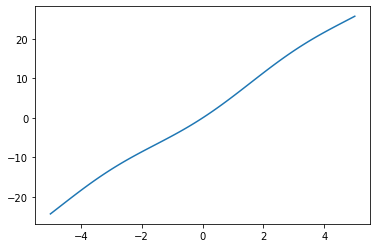

In [ ]:
def f_2(x, c):
  return -np.cos(x) + 5 * x + c


x = np.linspace(-5, 5, 100)
y = f_2(x, c=1)
plt.plot(x,y)

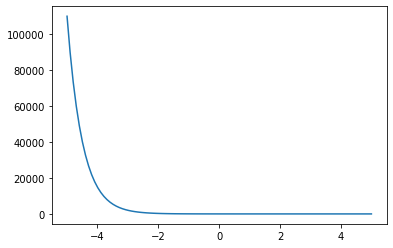

In [ ]:
def f_4(y,t):
  return np.exp(-2*x)*t


x = np.linspace(-5, 5, 100)
y = f_4(x, t=5)
plt.plot(x,y)

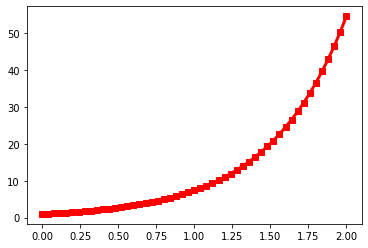

In [ ]:
import numpy as np
from scipy. integrate import odeint
import matplotlib.pyplot as plt

 # create function
def dydt(y,t):
	return 2*y

t = np.linspace(0, 2, 51) # vector of time
y0 = 1 # start value
y = odeint (dydt, y0, t) # solve eq.
y = np.array(y).flatten() 
plt.plot( t, y,'-sr', linewidth=3) # graphic
plt.show() # display

Ну что-ж, мы размялись. Теперь подумаем. Вот дали задачу, а ты не хочешь её решать. Да и бывает, что задачи не решаются аналитически. То есть невозможно написать ответ в строчку. Или эту задачу должны решать много раз микросхемы, например...

Тогда эти задачи решаются с помощью численных методов. То есть методом хитрых подгонов мы находим примерные решения - точки. 

Поэтому сейчас потренируемся программировать и ~~узнаем~~ вспомним некоторые (простые) методы.

### _Задача_: реализовать численные методы для решения дифференциальных уравнений.

Окей, вот новая задача.

> y' = x^2, y(0) = 1

> Аналитическое решение: y = (x^3)/3 + 1

Найдем решение методом Эйлера. Как это работает?

Во-первых, он работает для уравнений типа y' = f(x,y). Ну, нам больше и не надо. В нашем случае f(x,y) = x^2. А теперь...

Алгоритм:

1.   Сначала возьмем первую точку, где мы точно знаем, как функция работает. Это y(0)=1 --> (x,y) = (0,1)
2.   Определим шаг, с которым мы будем шагать.

> x_(i+1) = x_(i) + h, 

> обычно: h=0.01 или h=0.001, но мы возьмем побольше h=1 (чтобы убедиться, что метод не до конца точный)

3.   Следующая точка Y решения считается так:

> y_i = y_(i-1) + (x_i - x_(i-1)) * f(x_(i-1), y_(i-1))

4.   Посчитай столько, сколько нужно. Давай сделаем это на отрезке [0, 50].

Я напишу код.


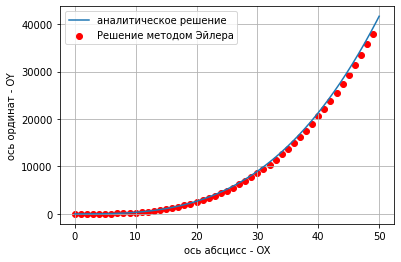

In [ ]:
# мой код намеренно гротескный, чтобы вам пришлось поразбираться почему и отчего
# тут написано одно или другое


def f_answear(x):
  # чтобы посмотреть, насколько у нас точное решение
  return (pow(x, 3))/3 + 1


def f(x):
  # это правая часть
  return pow(x, 2)


X_RIGHT_BORDER = 50 # конец отрезка на котором ищем решение
h = 1 # шаг по оси X
x = [0] # здесь будут храниться координаты точек X
y = [1] # здесь будут храниться координаты точек Y

while x[-1] != X_RIGHT_BORDER: # Соберем коордиаты X
  x.append(x[-1]+h)

# а теперь посчитаем Y методом Эйлера.

for i in range(1, len(x)-1): # вот считаем
  y_new = y[i-1] + (x[i] - x[i-1])*f(x[i-1])
  y.append(y_new)

# а теперь посчитаем правильное решение, чтобы сравнить
x_answear = np.linspace(0, X_RIGHT_BORDER, 1000)
y_answear = f_answear(x_answear)

# а теперь отрисуем графики
plt.scatter(x[0:-1], y, label='Решение методом Эйлера', c='r', marker='o')
plt.plot(x_answear, y_answear, label='аналитическое решение')
plt.xlabel('ось абсцисс - OX')
plt.ylabel('ось ординат - OY')
plt.legend()
plt.grid()

### _Задача_: поэкспериментировать.

Посмотрите на график. Если приглядеться, то аналитическое решение расходятся.

7) Сперва посмотрите, что будет, если выбрать h = 2 или 5.

8) Потом посмотрите, что будет, если выбрать h = 0.5 или 0.001.

9) Сделайте выводы.

### _Дополнительная задача_: перепишите код нормально

*) используйте numpy

**) заверните метод Эйлера в функцию

### _Задача_: реализуйте метод Рунге-Кута

у'=exp(x)-1, y(0)=0

10) Решите уравнение на бумажке и получите аналитическое решение.

11) Напишите код, реализующий поиск решения уравнения на отрезке [0, 50] неявным методом Рунге-Куте второго порядка.

12) Постройте графики.

Посмотреть описание метода можно тут:

https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%A0%D1%83%D0%BD%D0%B3%D0%B5_%E2%80%94_%D0%9A%D1%83%D1%82%D1%82%D1%8B

#Решение

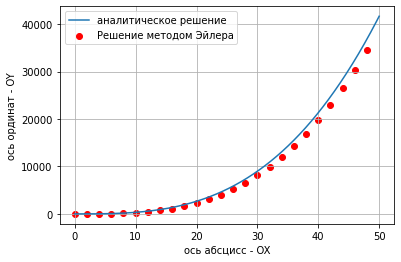

In [ ]:
#7
X_RIGHT_BORDER = 50 # конец отрезка на котором ищем решение
h = 2 # шаг по оси X
x = [0] # здесь будут храниться координаты точек X
y = [1] # здесь будут храниться координаты точек Y

while x[-1] != X_RIGHT_BORDER: # Соберем коордиаты X
  x.append(x[-1]+h)

# а теперь посчитаем Y методом Эйлера.

for i in range(1, len(x)-1): # вот считаем
  y_new = y[i-1] + (x[i] - x[i-1])*f(x[i-1])
  y.append(y_new)

# а теперь посчитаем правильное решение, чтобы сравнить
x_answear = np.linspace(0, X_RIGHT_BORDER, 1000)
y_answear = f_answear(x_answear)

# а теперь отрисуем графики
plt.scatter(x[0:-1], y, label='Решение методом Эйлера', c='r', marker='o')
plt.plot(x_answear, y_answear, label='аналитическое решение')
plt.xlabel('ось абсцисс - OX')
plt.ylabel('ось ординат - OY')
plt.legend()
plt.grid()

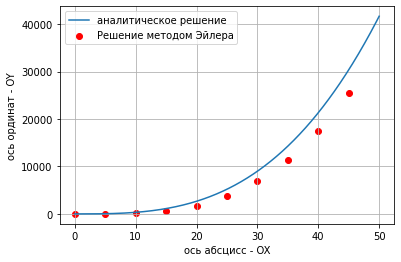

In [ ]:
#7
X_RIGHT_BORDER = 50 # конец отрезка на котором ищем решение
h = 5 # шаг по оси X
x = [0] # здесь будут храниться координаты точек X
y = [1] # здесь будут храниться координаты точек Y

while x[-1] != X_RIGHT_BORDER: # Соберем коордиаты X
  x.append(x[-1]+h)

# а теперь посчитаем Y методом Эйлера.

for i in range(1, len(x)-1): # вот считаем
  y_new = y[i-1] + (x[i] - x[i-1])*f(x[i-1])
  y.append(y_new)

# а теперь посчитаем правильное решение, чтобы сравнить
x_answear = np.linspace(0, X_RIGHT_BORDER, 1000)
y_answear = f_answear(x_answear)

# а теперь отрисуем графики
plt.scatter(x[0:-1], y, label='Решение методом Эйлера', c='r', marker='o')
plt.plot(x_answear, y_answear, label='аналитическое решение')
plt.xlabel('ось абсцисс - OX')
plt.ylabel('ось ординат - OY')
plt.legend()
plt.grid()

In [ ]:
#8
X_RIGHT_BORDER = 50 # конец отрезка на котором ищем решение
h = 0.001 # шаг по оси X
x = [0] # здесь будут храниться координаты точек X
y = [1] # здесь будут храниться координаты точек Y

while x[-1] != X_RIGHT_BORDER: # Соберем коордиаты X
  x.append(x[-1]+h)

# а теперь посчитаем Y методом Эйлера.

for i in range(1, len(x)-1): # вот считаем
  y_new = y[i-1] + (x[i] - x[i-1])*f(x[i-1])
  y.append(y_new)

# а теперь посчитаем правильное решение, чтобы сравнить
x_answear = np.linspace(0, X_RIGHT_BORDER, 1000)
y_answear = f_answear(x_answear)

# а теперь отрисуем графики
plt.scatter(x[0:-1], y, label='Решение методом Эйлера', c='r', marker='o')
plt.plot(x_answear, y_answear, label='аналитическое решение')
plt.xlabel('ось абсцисс - OX')
plt.ylabel('ось ординат - OY')
plt.legend()
plt.grid()

In [ ]:
#8
X_RIGHT_BORDER = 50 # конец отрезка на котором ищем решение
h = 0.5 # шаг по оси X
x = [0] # здесь будут храниться координаты точек X
y = [1] # здесь будут храниться координаты точек Y

while x[-1] != X_RIGHT_BORDER: # Соберем коордиаты X
  x.append(x[-1]+h)

# а теперь посчитаем Y методом Эйлера.

for i in range(1, len(x)-1): # вот считаем
  y_new = y[i-1] + (x[i] - x[i-1])*f(x[i-1])
  y.append(y_new)

# а теперь посчитаем правильное решение, чтобы сравнить
x_answear = np.linspace(0, X_RIGHT_BORDER, 1000)
y_answear = f_answear(x_answear)

# а теперь отрисуем графики
plt.scatter(x[0:-1], y, label='Решение методом Эйлера', c='r', marker='o')
plt.plot(x_answear, y_answear, label='аналитическое решение')
plt.xlabel('ось абсцисс - OX')
plt.ylabel('ось ординат - OY')
plt.legend()
plt.grid()

#9)Вывод: в зависимости от размера шага возрастает или убывает погрешность

In [ ]:
import numpy as np
def tikitok(x, c):
    return np.exp(x) - x + c

# RK-4 method
def rk4(x0,y0,xn,n):
    
    # Calculating step size
    h = (xn-x0)/n
    
    print('\n--------SOLUTION--------')
    print('-------------------------')    
    print('x0\ty0\tyn')
    print('-------------------------')
    for i in range(n):
        k1 = h * (tikitok(x0, y0))
        k2 = h * (tikitok((x0+h/2), (y0+k1/2)))
        k3 = h * (tikitok((x0+h/2), (y0+k2/2)))
        k4 = h * (tikitok((x0+h), (y0+k3)))
        k = (k1+2*k2+2*k3+k4)/6
        yn = y0 + k
        print('%.4f\t%.4f\t%.4f'% (x0,y0,yn) )
        print('-------------------------')
        y0 = yn
        x0 = x0+h
    
    print('\nAt x=%.4f, y=%.4f' %(xn,yn))

# Inputs
print('Enter initial conditions:')
x0 = float(input('x0 = '))
y0 = float(input('y0 = '))

print('Enter calculation point: ')
xn = float(input('xn = '))

print('Enter number of steps:')
step = int(input('Number of steps = '))

# RK4 method call
rk4(x0,y0,xn,step)

Enter initial conditions:
x0 = 0
y0 = 10
Enter calculation point: 
xn = 50
Enter number of steps:
Number of steps = 10

--------SOLUTION--------
-------------------------
x0	y0	yn
-------------------------
0.0000	10.0000	1028.5410
-------------------------
5.0000	1028.5410	131295.5743
-------------------------
10.0000	131295.5743	18145888.4904
-------------------------
15.0000	18145888.4904	2605582765.2505
-------------------------
20.0000	2605582765.2505	380982223997.3239
-------------------------
25.0000	380982223997.3239	56168794961745.1953
-------------------------
30.0000	56168794961745.1953	8311739330693806.0000
-------------------------
35.0000	8311739330693806.0000	1231973140124345344.0000
-------------------------
40.0000	1231973140124345344.0000	182736533420764037120.0000
-------------------------
45.0000	182736533420764037120.0000	27113675028591443705856.0000
-------------------------

At x=50.0000, y=27113675028591443705856.0000




---



А теперь посмотрим, как решать подобные задачи с помощью библиотек.
Например, можем использовать библиотеку scipy.

Вот, задача.

y' = -k*y, y(0) = 5, k = 0.3

А ниже код, как решать задачу с помощью библиотеки.

In [ ]:
from scipy.integrate import odeint

def model(y,t):
    k = 0.3
    return -k * y

y0 = 5
x = np.linspace(-1,20)

y = odeint(model,y0,x)

plt.plot(x,y,'b--', label='Решение с помощью библиотеки scipy.')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()

### _Финальная Задача_: сравните как работают все методы.

Итак, у вас уже есть: метод поиска аналитического решения на бумажке, метод Эйлера, метод Рунге-Кута и библиотека scipy.

А теперь последняя задача. Отрисовать все графики решений вышеописанных методов для следующей задачи и рассчитать расхождение методов посчитав среднюю ошибку:

> 5 * y'(x) = - y(x) + u(x), y(0) = 1

> на отрезке x = [0, 40]

> u(x) - ступенчатая функция, которая:

> u(x) = 0, x < 10

> u(x) = 2, x >= 10

In [ ]:
def f_answear(x):
  # чтобы посмотреть, насколько у нас точное решение
  return (pow(x, 3))/3 + 1


def f(x):
  # это правая часть
  return pow(x, 2)


X_RIGHT_BORDER = 50 # конец отрезка на котором ищем решение
h = 1 # шаг по оси X
x = [0] # здесь будут храниться координаты точек X
y = [1] # здесь будут храниться координаты точек Y

while x[-1] != X_RIGHT_BORDER: # Соберем коордиаты X
  x.append(x[-1]+h)

# а теперь посчитаем Y методом Эйлера.

for i in range(1, len(x)-1): # вот считаем
  y_new = y[i-1] + (x[i] - x[i-1])*f(x[i-1])
  y.append(y_new)

# а теперь посчитаем правильное решение, чтобы сравнить
x_answear = np.linspace(0, X_RIGHT_BORDER, 1000)
y_answear = f_answear(x_answear)

# а теперь отрисуем графики
plt.scatter(x[0:-1], y, label='Решение методом Эйлера', c='r', marker='o')
plt.plot(x_answear, y_answear, label='аналитическое решение')
plt.xlabel('ось абсцисс - OX')
plt.ylabel('ось ординат - OY')
plt.legend()
plt.grid()

In [ ]:
g = 9.81  # ms^-2, gravitational constant
h0 = 100. # m, initial height
v0 = 0.   # ms^-1, initial speed

ti = 0.   # s, initial time
tf = 10.0 # s, final time at which to seek the solution
dt = 0.5  # s, time step

In [ ]:
nt = int((tf-ti)/dt)

# Create numpy arrays to contain the
# intermediate values of y
y_exp = np.empty((nt+1, 2)) # Explicit RK2
y_imp = np.empty((nt+1, 2)) # Implicit RK2

# Store initial condition in y[0, :].
y_exp[0] = h0, v0
y_imp[0] = h0, v0

# Create vector b.
b = np.array([0., -g])

# Create matrix L.
L = np.array([[0., 1.], [0., 0.]])

# Compute the constant matrix needed in
# the implement implicit RK scheme.
# numpy.eye returns a unity matrix.
# The argument defines the shape of the matrix.
# There is a possibility to shift the dia-
# gonal if needed.
#
# For more info
# https://numpy.org/doc/stable/reference/generated/numpy.eye.html
mat_k = np.linalg.inv(np.eye(2)-L*dt/4.)

# Perform the time stepping according to
# both explicit and implicit schemes in
# one loop.
for i in range(nt):
    # Explicit time stepping
    y_star = y_exp[i] + 0.5*dt*(np.dot(L, y_exp[i])+b)
    y_exp[i+1] = y_exp[i] + dt*(np.dot(L, y_star)+b)

    # Implicit scheme time stepping.
    k_1 = np.dot(mat_k, np.dot(L, y_imp[i])+b)
    k_2 = np.dot(mat_k, np.dot(L, y_imp[i]+k_1*dt/2.)+b)
    y_imp[i+1] = y_imp[i] + 0.5*dt*(k_1+k_2)

In [ ]:
t = np.arange(nt+1) * dt

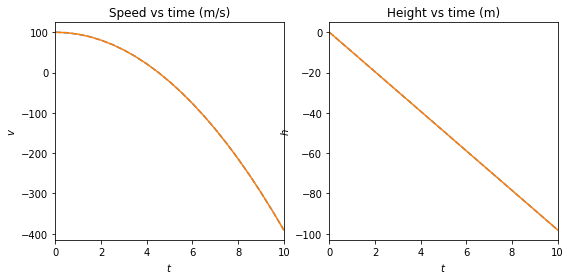

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].plot(t, y_exp[:, 0], '--')
ax[0].plot(t, y_imp[:, 0], '-')

ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$v$')
ax[0].set_title('Speed vs time (m/s)')

ax[1].plot(t, y_exp[:, 1], '--')
ax[1].plot(t, y_imp[:, 1], '-')

ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$h$')
ax[1].set_title('Height vs time (m)')

# Let us bind the axes to the relevant
# interval.
for axis in ax:
    axis.set_xlim(t[0], t[-1])